In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt
from datetime import timedelta as td

# The workflow: Indicator, Signal and strategy

## The column name protocols between different stages and staff
So that the data source can be interpreted by strategy

In [2]:
def ma_col_name(nperiods):
    return "MA"+str(nperiods)

def pre_ma_col_name(nperiods):
    return "Pre_"+ma_col_name(nperiods)

def crossup_col_name(ma_short, ma_long):
    return str(ma_short)+"_CU_"+str(ma_long)

def crossdown_col_name(ma_short, ma_long):
    return str(ma_short)+"_CD_"+str(ma_long)

## The MA parameters we will use

In [3]:
ma_range_short=list(range(5,10+1))
ma_range_long=list(range(25,35+1))
ma_range=ma_range_short+ma_range_long
ma_range

[5, 6, 7, 8, 9, 10, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# To Generate Market Data Indicators
such as Moving Average. 

Pandas is good at such computation intensive operations.

In [4]:
df=pd.read_csv("hist.BTCUSD.5m.csv", parse_dates=["datetime"],index_col="datetime")
df.sort_index(ascending=True,inplace=True) # Make sure the time series is in the right order
df.head()

,sym,close,volume
datetime,,,
2017-12-31 16:00:00,BTCUSD.BNC,13417.73,68.784592
2017-12-31 16:05:00,BTCUSD.BNC,13536.53,110.760373
2017-12-31 16:10:00,BTCUSD.BNC,13670.00,112.061707
2017-12-31 16:15:00,BTCUSD.BNC,13657.89,143.391186
2017-12-31 16:20:00,BTCUSD.BNC,13743.79,113.187083


## To check the abnormal in timestamp

In [12]:
df_dt=pd.DataFrame({"dt":df.index})
df_diff=df_dt["dt"].diff()
df_diff[df_diff!="00:05:00"]

0                          NaT
997            0 days 02:05:00
10609          0 days 00:00:00
10683          0 days 00:00:00
11024   1 days 09:33:14.789000
11265   0 days 00:16:45.211000
11527          0 days 00:35:00
Name: dt, dtype: timedelta64[ns]

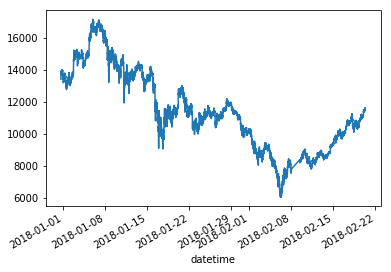

In [11]:
df.close.plot()
plt.show()

## Actually we can specify the way to generate moving average!!!

In [12]:
for i in ma_range:
    df[ma_col_name(i)]=df.close.rolling(i).mean()

for i in ma_range:
    df[pre_ma_col_name(i)]=df[ma_col_name(i)].shift(1)
    
df.head(40)

,sym,close,volume,MA5,MA6,MA7,MA8,MA9,MA10,MA25,...,Pre_MA26,Pre_MA27,Pre_MA28,Pre_MA29,Pre_MA30,Pre_MA31,Pre_MA32,Pre_MA33,Pre_MA34,Pre_MA35
datetime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 16:00:00,BTCUSD.BNC,13417.73,68.784592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 16:05:00,BTCUSD.BNC,13536.53,110.760373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 16:10:00,BTCUSD.BNC,13670.00,112.061707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 16:15:00,BTCUSD.BNC,13657.89,143.391186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 16:20:00,BTCUSD.BNC,13743.79,113.187083,13605.188,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 16:25:00,BTCUSD.BNC,13660.00,74.085238,13653.642,13614.323333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 16:30:00,BTCUSD.BNC,13821.86,59.573599,13710.708,13681.678333,13643.971429,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 16:35:00,BTCUSD.BNC,13883.95,100.461202,13753.498,13739.581667,13710.574286,13673.96875,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 16:40:00,BTCUSD.BNC,13936.32,135.732066,13809.184,13783.968333,13767.687143,13738.79250,13703.118889,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True) 
# For conviniency, we use the same starting point for all strategy. In other words, we may discard some first rows
df.head()

## To save the market indicators

In [14]:
df.to_csv("indicators.csv")

# Step 2: To Generate Market Signals

In [15]:
for ma_short in ma_range_short:
    for ma_long in ma_range_long:
        crossdown_col=crossdown_col_name(ma_short,ma_long)
        crossup_col=crossup_col_name(ma_short,ma_long)
        short_col=ma_col_name(ma_short)
        long_col=ma_col_name(ma_long)
        pre_short_col=pre_ma_col_name(ma_short)
        pre_long_col=pre_ma_col_name(ma_long)        
        df[crossdown_col]=(df[short_col]<df[long_col]) & (df[pre_short_col]>df[pre_long_col])
        df[crossup_col]=(df[short_col]>df[long_col]) & (df[pre_short_col]<df[pre_long_col])

## To save the generated market indicators

In [16]:
df.to_csv("signals.csv")